In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(data.drop('sales', axis=1), data.sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Intercept ',model.intercept_)
print('TV        ',model.coef_[0])
print('radio     ',model.coef_[1])
print('newspaper ',model.coef_[2])

Intercept  2.938889369459412
TV         0.0457646454553976
radio      0.18853001691820442
newspaper  -0.0010374930424763285


In [5]:
import statsmodels.formula.api as sm

In [15]:
# Fitting the OLS on data
model = sm.ols('sales ~ TV + radio + newspaper', data).fit()
print(model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


## Collinearity

### To understand this, let's see hoe these variables are correlated with each other.

In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Let's visualize these numbers using a heatmap

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

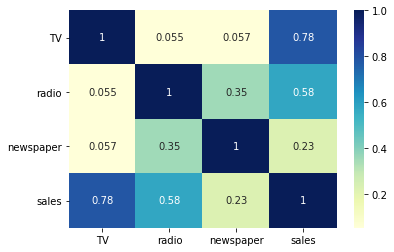

In [12]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

#### Sales & Radio     --> probable causation
#### Newspaper & Radio --> multiollinearity
#### Sales & Newspaper --> transitive correlation

## Hypothesis Test for Predictors

#### Null Hypothesis : All the coefficients are equal to zero.

#### Alternative Hypothesis : At least one coefficients is not zero.

### The hypothesis test is performed by using F-Statistic.

In [16]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2020-07-16 16:03 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
--------------------

<h3><i>If the value of F-statistic is equal to or very close to 1, then the results are in favor of the Null Hypothesis and we fail to reject it.</i></h3>

## Feature Selection or Variable Selection

### One way of doing this is trying all possible combinations i.e.

<ul>
    <li>Only TV</li>
    <li>Only radio</li>
    <li>Only newspaper</li>
    <li>TV and radio</li>
    <li>TV and newspaper</li>
    <li>radio and newspaper</li>
    <li>TV,radio and newspaper</li>
</ul>
<h3>Here, it still looks feasible to try all 7 combinations, but if there are more predictors, the number of combinations will increase exponentially. For example, by adding only one more predictor to our case studey, the total combinations would become 15. Just imagine having a dozen predictors.</h3><br><h3>Hence we need more efficient ways to perform Feature Slection.</h3>

Feature Selection
<ul>
 <li>Forward Selection</li>
 <li>Backward Selection</li>
</ul>

We are going to use 2 measures to evaluate our new model after each addition: RSS and R².

We are already familiar with RSS which is the Residual Sum of Squares and is calculated by squaring the difference between actual outputs and predicted outcomes. It should be minimum for the model to perform well.

R² is the measure of the degree to which variance in data is explained by the model. Mathematically, it’s the square of the correlation between actual and predicted outcomes. R² closer to 1 indicates that the model is good and explains the variance in data well. A value closer to zero indicates a poor model.

<h3>R<sup>2</sup> closer to 1 indicates Good model.</h3>
<h3>RSS should be minimum for the model to preform well.</h3>

In [21]:
# Defining a function to evaluate a model
def evaluateModel(model):
    print("RSS = ", ((data.sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

### Let’s first evaluate models with single predictors one by one, starting with TV.

In [22]:
# For TV
model_TV = sm.ols('sales ~ TV', data).fit()
evaluateModel(model_TV)

RSS =  2102.5305831313512
R2 =  0.611875050850071


In [23]:
# For radio
model_radio = sm.ols('sales ~ radio', data).fit()
evaluateModel(model_radio)

RSS =  3618.4795490250876
R2 =  0.33203245544529536


In [24]:
# For newspaper
model_newspaper = sm.ols('sales ~ newspaper', data).fit()
evaluateModel(model_newspaper)

RSS =  5134.804544111939
R2 =  0.05212044544430516


### Now, we will add the radio and newspaper one by one and check the new values.

In [26]:
# For TV & radio
model_TV_radio = sm.ols('sales ~ TV + radio', data).fit()
evaluateModel(model_TV_radio)

RSS =  556.9139800676182
R2 =  0.8971942610828956


In [28]:
# For TV & newspaper
model_TV_newspaper = sm.ols('sales ~ TV + newspaper', data).fit()
evaluateModel(model_TV_newspaper)

RSS =  1918.5618118968277
R2 =  0.6458354938293271


In [29]:
# For TV, radio & newspaper
model_all = sm.ols('sales ~ TV + radio + newspaper', data).fit()
evaluateModel(model_all)

RSS =  556.8252629021873
R2 =  0.8972106381789522


### So our final model can be expressed as below:

In [30]:
# Fitting the OLS on data
model = sm.ols('sales ~ TV + radio', data).fit()
print(model.params)

Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
